## 머신러닝을 위한 이미지 데이터
- 기계 학습을 위한 데이터 준비

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

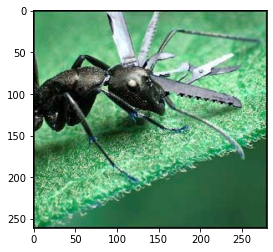

In [2]:
# 이미지 그레이 스케일로 load
img = cv2.imread('./ants/swiss-army-ant.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show

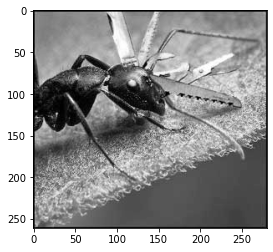

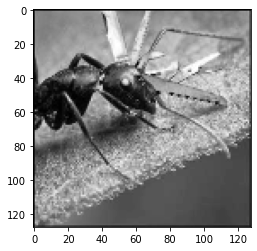

(128, 128)
[8, 11, 9, 5, 8, 8, 5, 5, 5, 5]


In [4]:
# 이미지 그레이 스케일로 가져오기
img = cv2.imread('./ants/swiss-army-ant.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show()

gray_img = cv2.resize(gray_img, (128,128))
plt.imshow(gray_img, cmap='gray')
plt.show()

print(gray_img.shape)
print(np.array(gray_img).flatten().tolist()[:10])

In [5]:
# 이미지 폴더 정의
dirs = ['ants', 'bees']

# 이미지에 대한 설명변수(픽셀값)와 목적변수(레이블)의 값을 저장할 리스트 생성
pixels = []
labels = []

# 이미지를 읽어와 필요한 모양으로 데이터 처리 후 리스트 저장
# enumerate(dirs): 연속형 데이터에서 index와 value 원소를 동시에 접근
for i, d in enumerate(dirs):
   # 파일명 취득
    files = os.listdir('./' + d)
    # print(files)
    
    for f in files:
        # 이미지를 그레이 스케일로 읽어오기
        img = cv2.imread('./' + d + "/" + f, 0)
        
        # 이미지 크기를 128*128로 변경
        img = cv2.resize(img, (128, 128))
        
        # 픽셀값 추가
        img = np.array(img).flatten().tolist()
        pixels.append(img)
        
        # 이미지에 대한 레이블 리스트 추가
        labels.append(i)

### [참고] 정규화
- 참고:
- 최소 최대 정규화 (Min Max normalization)
- 특성들의 범위가 0에서 1사이 ([0,1])가 되도록 비례적으로 맞추기
- 여기서 말하는 정규화는 정규분포가 아니라 단순히 특성들의 범위를 맞추는 것을 뜻함

In [6]:
# 픽셀값을 DataFrame 형식으로 변환
pixels_df = pd.DataFrame(pixels)
pixels_df = pixels_df/255 # 0~1(최소 최대 정규화)

# 레이블값을 DataFrame 형식으로 변환
labels_df = pd.DataFrame(labels, columns = ['label'])  # labels_df 줄에서 columns 오타 있습니다

# 위에서 만들어진 두 df를 수평결합(열 추가)
img_data = pd.concat([pixels_df, labels_df], axis = 1)

display(img_data.head())
display(img_data.tail())

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.580392,0.560784,0.564706,0.498039,0.505882,0.556863,0.556863,0.549020,0.560784,0.627451,...,0.156863,0.168627,0.160784,0.156863,0.152941,0.141176,0.145098,0.129412,0.137255,0
1,0.321569,0.321569,0.321569,0.301961,0.294118,0.301961,0.317647,0.305882,0.294118,0.278431,...,0.486275,0.474510,0.462745,0.447059,0.427451,0.411765,0.384314,0.364706,0.345098,0
2,0.152941,0.149020,0.145098,0.141176,0.141176,0.145098,0.152941,0.160784,0.172549,0.184314,...,0.203922,0.196078,0.176471,0.168627,0.160784,0.149020,0.141176,0.141176,0.137255,0
3,0.749020,0.745098,0.729412,0.737255,0.737255,0.737255,0.729412,0.721569,0.721569,0.729412,...,0.505882,0.317647,0.309804,0.615686,0.556863,0.627451,0.490196,0.396078,0.450980,0
4,0.015686,0.035294,0.007843,0.003922,0.027451,0.023529,0.015686,0.019608,0.019608,0.019608,...,0.125490,0.129412,0.129412,0.129412,0.129412,0.133333,0.113725,0.137255,0.090196,0


,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
152,0.996078,0.980392,0.992157,1.000000,0.956863,0.890196,0.898039,0.992157,0.996078,0.980392,...,0.792157,0.717647,0.643137,0.607843,0.462745,0.454902,0.458824,0.458824,0.454902,1
153,0.309804,0.317647,0.317647,0.325490,0.333333,0.337255,0.341176,0.345098,0.356863,0.364706,...,0.219608,0.200000,0.196078,0.200000,0.196078,0.196078,0.192157,0.184314,0.176471,1
154,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
155,0.490196,0.521569,0.592157,0.564706,0.552941,0.517647,0.478431,0.427451,0.400000,0.525490,...,0.176471,0.200000,0.227451,0.235294,0.239216,0.266667,0.254902,0.235294,0.215686,1
156,0.486275,0.505882,0.501961,0.509804,0.537255,0.490196,0.478431,0.490196,0.647059,0.709804,...,0.129412,0.109804,0.141176,0.149020,0.137255,0.133333,0.207843,0.325490,0.392157,1


### [미션] 컬러 이미지에 대한 설명변수/목적변수 세트 생성
- 설명변수: pixelsC, 목적변수: labelsC
- 그레이 => 2차원 / 컬러 => 3차원
* cv2를 이용해 데이터 읽어오기
* 이미지 사이즈를 128x128 로 변경
* 픽셀을 B, G, R 단위로 분할
* np.array()로 변환 => flatten() => tolist()로 변경해 각각 저장
* 변경 데이터는 최종 설명변수와 목적변수에 저장
- 데이터를 DataFrame형식으로 변경
* 설명DF: Max/Min 으로 정규화
* 목적DF: 컬렴명 지정
* 설명DF + 목적DF (열 추가/수평결합)

In [7]:
# 이미지 폴더 정의
dirs = ['ants', 'bees']

# 이미지에 대한 설명변수(픽셀값)와 목적변수(레이블)의 값을 저장할 리스트 생성
pixels = []
labels = []

# 이미지를 읽어와 필요한 모양으로 데이터 처리 후 리스트 저장
for i, d in enumerate(dirs):
   # 파일명 취득
    files = os.listdir('./' + d)
    
    for f in files:
        img = cv2.imread('./' + d + "/" + f)# 이미지를 BGR 형식으로 읽어오기
        img = cv2.resize(img, (128, 128)) # 이미지 크기를 128*128로 변경
        
        b,g,r = cv2.split(img)
        # 픽셀값을 flatten()로 1차원 배열 형식으로 변경/ tolist()를 이용해 리스트 형식으로 변경
        b = np.array(b).flatten().tolist() 
        g = np.array(g).flatten().tolist() 
        r = np.array(r).flatten().tolist() 
        pixels.append(img) # 픽셀값 추가
        
        # 이미지에 대한 레이블 리스트 추가
        labels.append(i)

In [8]:
# flatten()
x = np.array( [[10, 20], [22, 13], [55, 20]] )
print(type(x.flatten()), "\n", x.flatten())
print(type(x.flatten().tolist()),"\n", x.flatten().tolist())

<class 'numpy.ndarray'> 
 [10 20 22 13 55 20]
<class 'list'> 
 [10, 20, 22, 13, 55, 20]


In [9]:
x = np.array( [[10, 20], [22, 13], [55, 20]] )
print(type(x.reshape(-1)), "\n", x.reshape(-1))
print(type(x.reshape(-1).tolist()),"\n", x.reshape(-1).tolist())

<class 'numpy.ndarray'> 
 [10 20 22 13 55 20]
<class 'list'> 
 [10, 20, 22, 13, 55, 20]


In [10]:
# 이미지 폴더 정의
dirs = ['ants', 'bees']

# 이미지에 대한 설명변수(픽셀값)와 목적변수(레이블)의 값을 저장할 리스트 생성
pixelsC = []
labelsC = []

# 이미지를 읽어와 필요한 모양으로 데이터 처리 후 리스트 저장
for i, d in enumerate(dirs):
    # 파일명 취득
    files = os.listdir('./' + d)
      
    for f in files:
        img = cv2.imread('./' + d + "/" + f) # 이미지를 BGR 형식으로 읽어오기
        img = cv2.resize(img, (128, 128))  # 이미지 크기를 128*128로 변경
        
        b, g, r = cv2.split(img)  # 픽셀 값에서 B, G, R 분할
        
        # 픽셀값을 flatten()로 1차원 배열 형식으로 변경/tolist()를 이용해 리스트 형식으로 변경
        b = np.array(b).flatten().tolist()
        g = np.array(g).flatten().tolist()
        r = np.array(r).flatten().tolist()  
        pixelsC.append( b + g + r)  # 픽셀값 추가
        
        # 이미지에 대한 레이블 리스트 추가
        labels.append(i)

In [11]:
# 픽셀값을 DataFrame 형식으로 변환
pixelsC_df = pd.DataFrame(pixelsC)
pixelsC_df = pixelsC_df/255  # 0~1(최소 최대 정규화)

# 레이블값을 DataFrame 형식으로 변환
labelsC_df = pd.DataFrame(labelsC, columns=['lable'])

# 위에서 만들어진 두 df를 수평결합(열 추가)
imgC_data = pd.concat([pixelsC_df, labelsC_df], axis=1)
display(imgC_data.head())
display(imgC_data.tail())

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,lable
0,0.007843,0.000000,0.000000,0.000000,0.003922,0.007843,0.007843,0.000000,0.000000,0.011765,...,0.098039,0.090196,0.109804,0.105882,0.098039,0.082353,0.086275,0.074510,0.094118,NaN
1,0.364706,0.364706,0.368627,0.345098,0.333333,0.337255,0.356863,0.341176,0.329412,0.313725,...,0.227451,0.219608,0.203922,0.196078,0.180392,0.176471,0.164706,0.152941,0.145098,NaN
2,0.078431,0.066667,0.050980,0.043137,0.050980,0.050980,0.050980,0.062745,0.074510,0.090196,...,0.149020,0.141176,0.129412,0.113725,0.105882,0.094118,0.082353,0.090196,0.090196,NaN
3,0.650980,0.647059,0.631373,0.639216,0.650980,0.647059,0.631373,0.623529,0.615686,0.631373,...,0.568627,0.396078,0.423529,0.698039,0.658824,0.725490,0.560784,0.505882,0.490196,NaN
4,0.117647,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,...,0.098039,0.101961,0.101961,0.101961,0.101961,0.090196,0.082353,0.105882,0.070588,NaN


,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,lable
152,0.996078,0.980392,0.992157,1.000000,0.956863,0.898039,0.913725,0.992157,0.996078,0.980392,...,0.964706,0.894118,0.803922,0.733333,0.517647,0.450980,0.450980,0.443137,0.443137,NaN
153,0.000000,0.003922,0.000000,0.000000,0.003922,0.003922,0.000000,0.000000,0.003922,0.000000,...,0.196078,0.160784,0.156863,0.168627,0.164706,0.164706,0.149020,0.145098,0.145098,NaN
154,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
155,0.807843,0.831373,0.850980,0.831373,0.831373,0.831373,0.811765,0.807843,0.780392,0.862745,...,0.235294,0.258824,0.286275,0.301961,0.305882,0.341176,0.329412,0.290196,0.247059,NaN
156,0.603922,0.635294,0.635294,0.647059,0.670588,0.596078,0.596078,0.600000,0.749020,0.815686,...,0.101961,0.082353,0.113725,0.121569,0.113725,0.109804,0.184314,0.317647,0.396078,NaN


In [12]:
img_data.iloc[0, :128] # 이미지의 첫번째 행 데이터

0      0.580392
1      0.560784
2      0.564706
3      0.498039
4      0.505882
         ...   
123    0.513725
124    0.517647
125    0.447059
126    0.466667
127    0.564706
Name: 0, Length: 128, dtype: float64

In [13]:
imgC_data.iloc[0, :128] # 이미지의 첫번째 행의 B에 대한 값

0      0.007843
1           0.0
2           0.0
3           0.0
4      0.003922
         ...   
123         0.0
124         0.0
125    0.003922
126         0.0
127    0.011765
Name: 0, Length: 128, dtype: object